In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim

Polynomial Regression (Degree 2) - Train RMSE: 0.41918615196336195, Validation RMSE: 0.41180782974646435
Polynomial Regression (Degree 3) - Train RMSE: 0.36527281404734846, Validation RMSE: 0.4096612958939282
Polynomial Regression (Degree 4) - Train RMSE: 0.28165476564283587, Validation RMSE: 3.6963392265343447
Polynomial Regression (Degree 5) - Train RMSE: 0.18020244392418078, Validation RMSE: 42.500420891683106
Best Polynomial Regression (Degree 3) - Test RMSE: 0.4530424904654829


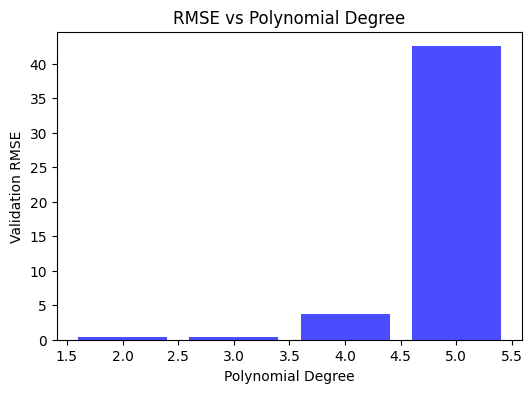

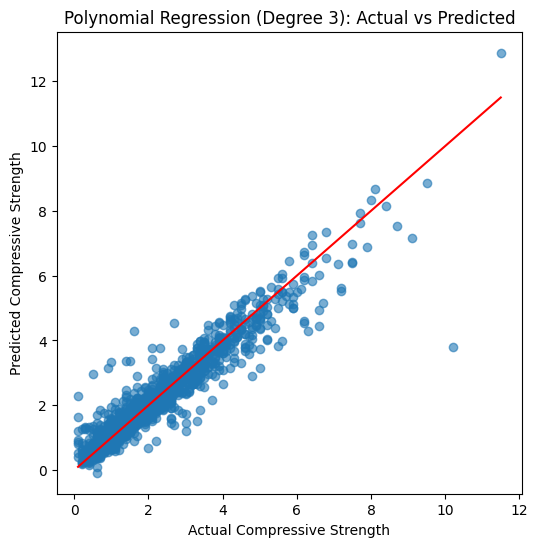

In [5]:
df = pd.read_csv("AirQuality.csv")
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

X_train, y_train = train_data.iloc[:, :-1].values, train_data["CO"].values
X_val, y_val = val_data.iloc[:, :-1].values, val_data["CO"].values
X_test, y_test = test_data.iloc[:, :-1].values, test_data["CO"].values
degrees = [2, 3, 4, 5]
rmse_train_list, rmse_val_list = [], []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    
    y_train_poly_pred = poly_reg.predict(X_train_poly)
    y_val_poly_pred = poly_reg.predict(X_val_poly)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_poly_pred))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_poly_pred))

    rmse_train_list.append(rmse_train)
    rmse_val_list.append(rmse_val)

    print(f"Polynomial Regression (Degree {d}) - Train RMSE: {rmse_train}, Validation RMSE: {rmse_val}")


best_degree = degrees[np.argmin(rmse_val_list)]
poly_best = PolynomialFeatures(degree=best_degree)
X_train_best = poly_best.fit_transform(X_train)
X_test_best = poly_best.transform(X_test)

best_poly_model = LinearRegression()
best_poly_model.fit(X_train_best, y_train)
y_test_best_pred = best_poly_model.predict(X_test_best)


rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_best_pred))
print(f"Best Polynomial Regression (Degree {best_degree}) - Test RMSE: {rmse_test_best}")


plt.figure(figsize=(6, 4))
plt.bar(degrees, rmse_val_list, color="blue", alpha=0.7)
plt.xlabel("Polynomial Degree")
plt.ylabel("Validation RMSE")
plt.title("RMSE vs Polynomial Degree")
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_best_pred, alpha=0.6)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title(f"Polynomial Regression (Degree {best_degree}): Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.show()
